## Question 1
### 

## Question 2

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

def load_data():
    boston = datasets.load_boston()
    X = boston.data
    y = boston.target
    features = boston.feature_names
    return X, y, features


def visualize(X, y, features):
    plt.figure(figsize=(20, 5))
    feature_count = X.shape[1]

    # i: index
    for i in range(feature_count):
        plt.subplot(3, 5, i + 1)
        #TODO: Plot feature i against y
        plt.plot(X[:,i], y, 'ro')
    
    plt.tight_layout()
    plt.show()


def fit_regression(X, Y):
    #TODO: implement linear regression
    # Remember to use np.linalg.solve instead of inverting!
    biased = np.insert(X, 0, 1, axis=1)
    a = np.matmul(biased.transpose(), biased)
    b = np.matmul(biased.transpose(), Y)
    t = np.linalg.solve(a,b)
    return t

### a)
Load the Boston housing data from the sklearn datasets module

In [2]:
X, y, features = load_data()
print("Features: {}".format(features))

Features: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### b)

In [3]:
print(X.shape)

(506, 13)


There are in total 506 houses, each house has 13 features. The target is the price of the house.
### c)

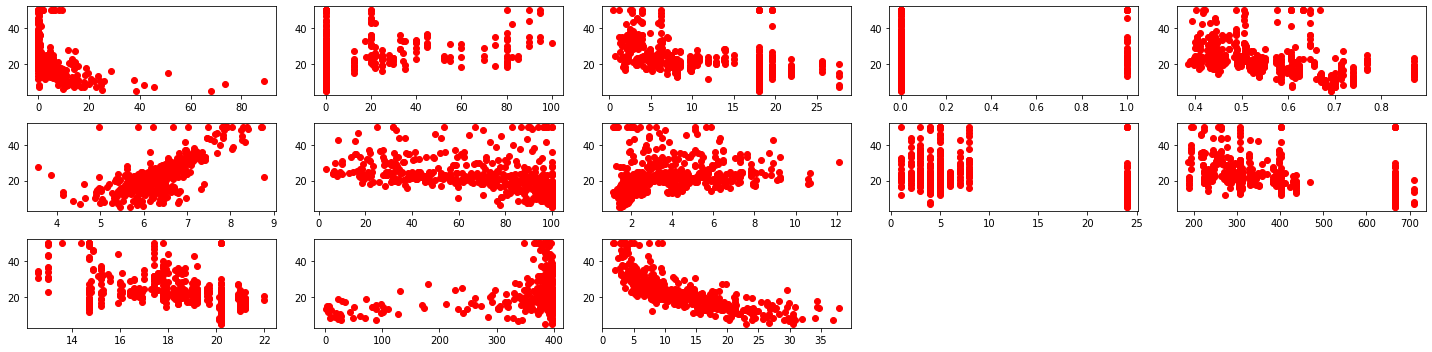

In [4]:
visualize(X, y, features)

### d)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
# Fit regression model
w = fit_regression(x_train, y_train)

### e)

In [6]:

for i in range(X.shape[1]+1):
    if(i == 0):
        print("Feature: Bias   Weight: " + str(w[i]))
    else:
        print("Feature: "+features[i-1] +"   Weight: " +  str(w[i-1]))

Feature: Bias   Weight: 28.483713559697755
Feature: CRIM   Weight: 28.483713559697755
Feature: ZN   Weight: -0.07199898546489471
Feature: INDUS   Weight: 0.04180681408365433
Feature: CHAS   Weight: 0.044675298593424714
Feature: NOX   Weight: 3.7849566396315595
Feature: RM   Weight: -17.155872457505446
Feature: AGE   Weight: 4.383435778647863
Feature: DIS   Weight: 0.005856745605406923
Feature: RAD   Weight: -1.3222115984897547
Feature: TAX   Weight: 0.2738949641892747
Feature: PTRATIO   Weight: -0.010488167158918356
Feature: B   Weight: -0.8661606950828407
Feature: LSTAT   Weight: 0.012290726020138932


Feature INDUS's sign is positive. This is what we expected since proportion of non-retail business acres per town should positively affect the house's price.

In [7]:
result_y = []
for i in x_test:
    biased_i = np.insert(i, 0, 1)
    result_y.append(np.dot(biased_i, w))
print(mean_squared_error(y_test, result_y))

28.399258173245155
